<a href="https://colab.research.google.com/github/Rinkusoni2910/EDA_Missing-Values-_Outlier-_-ML/blob/main/Task_EDA_%2B_Missing_Values_%2B_Outlier_%2B_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Step - 1 - Introduction -> Give a detailed data description and objective

#About Dataset
An individual’s annual income results from various factors. Intuitively, it is influenced by the individual’s education level, age, gender, occupation, and etc.

Fields
The dataset contains 15 columns
Target filed: Income
-- The income is divide into two classes: <=50K and >50K
Number of attributes: 15
-- These are the demographics and other features to describe a person

We can explore the possibility in predicting income level based on the individual’s personal information.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('/content/adult - adult.csv')

In [3]:
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


#Check size of dataset

In [4]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

In [5]:
df.shape

(48842, 15)

#Check the Columns of dataset

#Check Unique values

In [6]:
df.nunique()

age                   74
workclass              9
fnlwgt             28523
education             16
educational-num       16
marital-status         7
occupation            15
relationship           6
race                   5
gender                 2
capital-gain         123
capital-loss          99
hours-per-week        96
native-country        42
income                 2
dtype: int64

#Check for Null values

In [7]:
df.isnull().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

we see that there are no null values in the dataset

#Check the datatypes of the attributes

In [8]:
df.dtypes

age                 int64
workclass          object
fnlwgt              int64
education          object
educational-num     int64
marital-status     object
occupation         object
relationship       object
race               object
gender             object
capital-gain        int64
capital-loss        int64
hours-per-week      int64
native-country     object
income             object
dtype: object

#Summarize or Describe entire dataset

In [9]:
df.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [10]:
df.describe(include='all')

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
count,48842.000000,48842,4.884200e+04,48842,48842.000000,48842,48842,48842,48842,48842,48842.000000,48842.000000,48842.000000,48842,48842
unique,NaN,9,NaN,16,NaN,7,15,6,5,2,NaN,NaN,NaN,42,2
top,NaN,Private,NaN,HS-grad,NaN,Married-civ-spouse,Prof-specialty,Husband,White,Male,NaN,NaN,NaN,United-States,<=50K
freq,NaN,33906,NaN,15784,NaN,22379,6172,19716,41762,32650,NaN,NaN,NaN,43832,37155
mean,38.643585,NaN,1.896641e+05,NaN,10.078089,NaN,NaN,NaN,NaN,NaN,1079.067626,87.502314,40.422382,NaN,NaN
std,13.710510,NaN,1.056040e+05,NaN,2.570973,NaN,NaN,NaN,NaN,NaN,7452.019058,403.004552,12.391444,NaN,NaN
min,17.000000,NaN,1.228500e+04,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,1.000000,NaN,NaN
25%,28.000000,NaN,1.175505e+05,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
50%,37.000000,NaN,1.781445e+05,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
75%,48.000000,NaN,2.376420e+05,NaN,12.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,45.000000,NaN,NaN


In [11]:
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


#Find duplicate rows if any 

In [13]:
Duplicate_Rows=df[df.duplicated()].count()
Duplicate_Rows

age                52
workclass          52
fnlwgt             52
education          52
educational-num    52
marital-status     52
occupation         52
relationship       52
race               52
gender             52
capital-gain       52
capital-loss       52
hours-per-week     52
native-country     52
income             52
dtype: int64

As we can notice there are few duplicates so we have to remove them

In [14]:
df=df[~df.duplicated()]
df

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


#Data cleaning
#As we can see data contains '?' so we need to remove this

In [15]:
from numpy import nan
df = df.replace('?',nan)
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,NaN,103497,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K


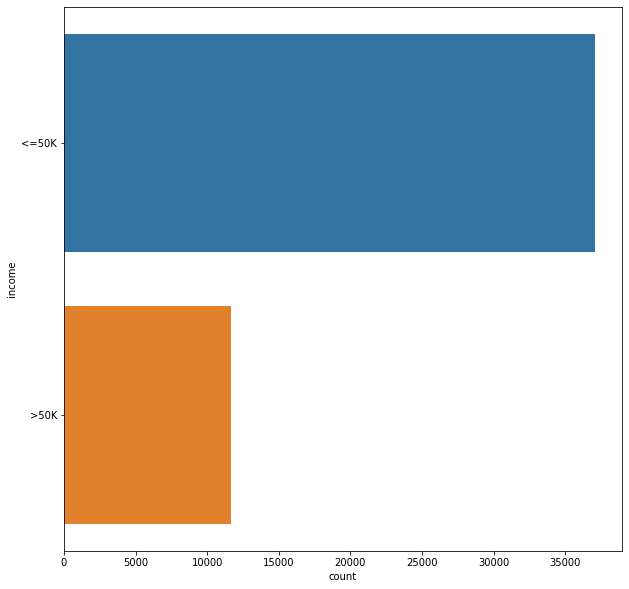

In [16]:
plt.figure(figsize=(10,10))
sns.countplot(y=df['income'])

#We observe that  less that most of the salary is 50k 

In [17]:
df['income']=df['income'].map({'<=50K': 0, '>50K': 1, '<=50K.': 0, '>50K.': 1})
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,0
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,0
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,1
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,1
4,18,NaN,103497,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,0


#Check for Null values

In [18]:
df.isnull().sum()

age                   0
workclass          2795
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2805
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      856
income                0
dtype: int64

Since we replaced ? with NaN the dataset now contains null values

We observe there are null values in workclass, occupation, native-country so we try to replace them with mode

In [19]:
df['workclass'].fillna(df['workclass'].mode()[0],inplace = True)
df['occupation'].fillna(df['occupation'].mode()[0],inplace = True)
df['native-country'].fillna(df['native-country'].mode()[0],inplace = True)

In [20]:
df.isnull().sum()


age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

Since we don't have any more null values we can proceed with next process

In [21]:
# separating numerical, categorical and dateTime features
cat_data = df.select_dtypes(exclude=[np.number, np.datetime64])
num_data = df.select_dtypes(exclude=[np.object, np.datetime64])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  This is separate from the ipykernel package so we can avoid doing imports until


In [22]:
num_data.head()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,income
0,25,226802,7,0,0,40,0
1,38,89814,9,0,0,50,0
2,28,336951,12,0,0,40,1
3,44,160323,10,7688,0,40,1
4,18,103497,10,0,0,30,0


In [23]:
cat_data.head()

,workclass,education,marital-status,occupation,relationship,race,gender,native-country
0,Private,11th,Never-married,Machine-op-inspct,Own-child,Black,Male,United-States
1,Private,HS-grad,Married-civ-spouse,Farming-fishing,Husband,White,Male,United-States
2,Local-gov,Assoc-acdm,Married-civ-spouse,Protective-serv,Husband,White,Male,United-States
3,Private,Some-college,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,United-States
4,Private,Some-college,Never-married,Prof-specialty,Own-child,White,Female,United-States


#Univariate Analysis and Bivariate Analysis

#Univariate Analysis for numerical attributes
#Box Plot for numerical attributes 
Box Plot for numerical attributes to understand outliers

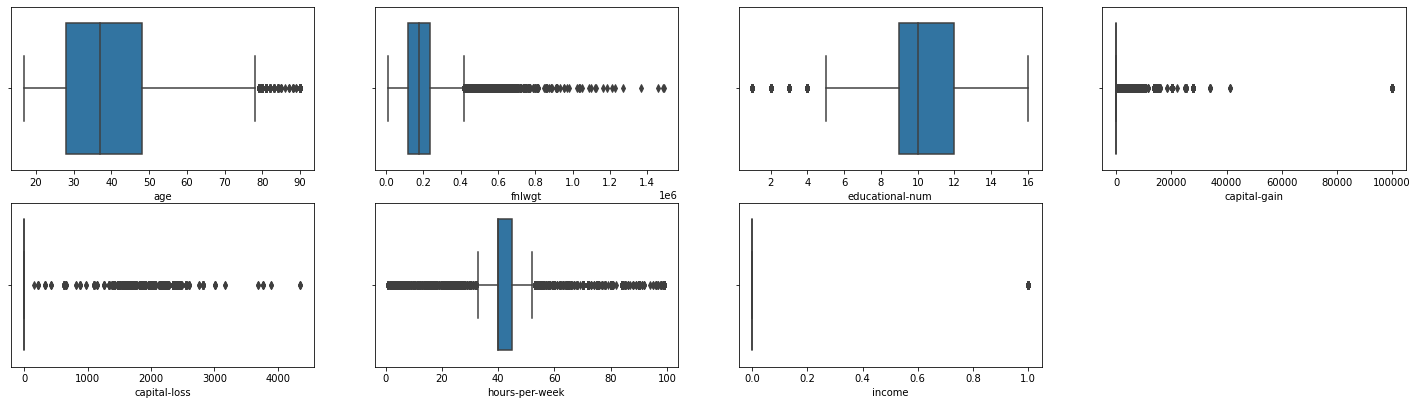

In [24]:
plt.subplots(figsize=(25, 50))
count = 1
for i in num_data.columns:
    plt.subplot(14, 4, count)
    sns.boxplot(x = num_data[i])
    count += 1
plt.show()

#Overall observation from boxplot
*   Boxplot makes visualization of outliers easy and convenient.
*   From the plots, it is clear that there are some outliers.



# Histogram for numerical data
The histogram is a popular graphing tool. It is used to summarize discrete or continuous data that are measured on an interval scale. It is often used to illustrate the major features of the distribution of the data in a convenient form. It is also useful when dealing with large data sets (greater than 100 observations). It can help detect any unusual observations (outliers) or any gaps in the data.

A histogram divides up the range of possible values in a data set into classes or groups. For each group, a rectangle is constructed with a base length equal to the range of values in that specific group and a length equal to the number of observations falling into that group.

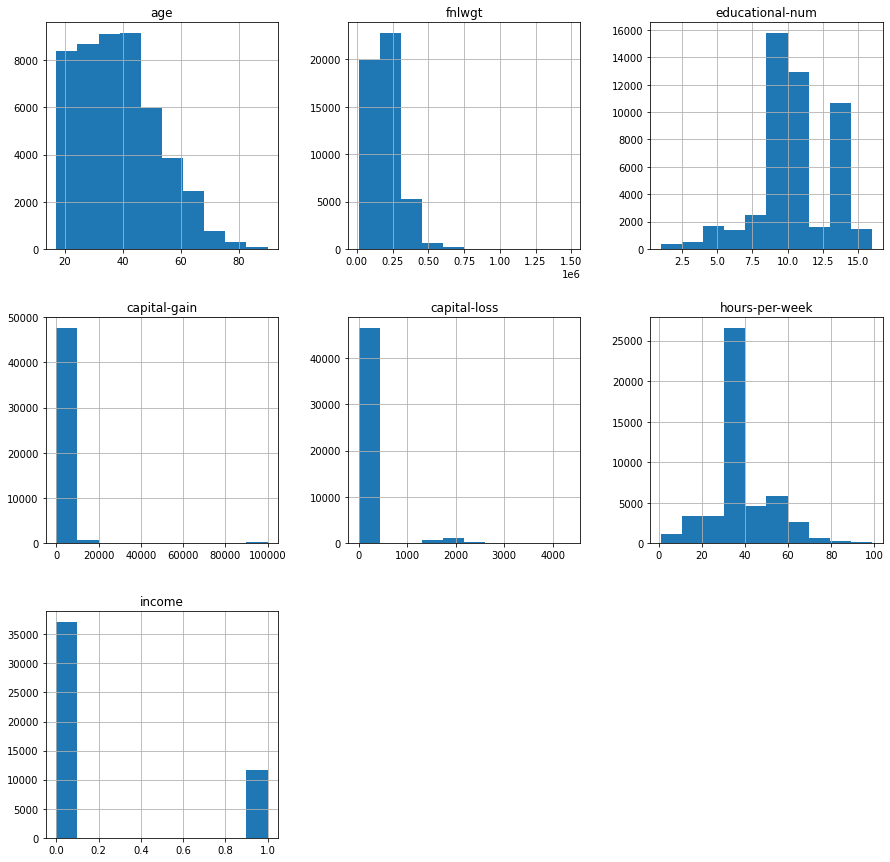

In [25]:
subset = df[num_data.columns]
subset.hist(figsize=(15, 15))
plt.show()

(array([37109.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0., 11681.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

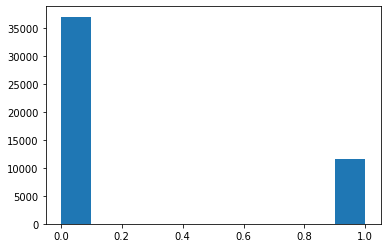

In [26]:
plt.hist(df['income'])

(array([3.6655e+04, 3.1360e+03, 3.8610e+03, 0.0000e+00, 1.4320e+03,
        1.9810e+03, 0.0000e+00, 1.6940e+03, 2.1000e+01, 1.0000e+01]),
 array([0. , 0.7, 1.4, 2.1, 2.8, 3.5, 4.2, 4.9, 5.6, 6.3, 7. ]),
 <a list of 10 Patch objects>)

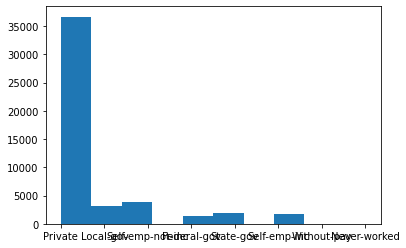

In [27]:
plt.hist(df['workclass'])

(array([17582.,  1601., 12252.,   834.,  8967.,  2656.,  1101.,  2060.,
         1411.,   326.]),
 array([ 0. ,  1.5,  3. ,  4.5,  6. ,  7.5,  9. , 10.5, 12. , 13.5, 15. ]),
 <a list of 10 Patch objects>)

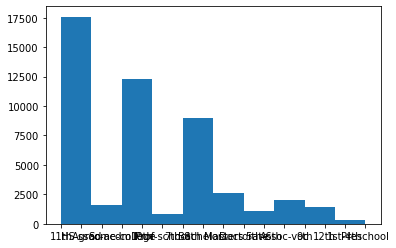

In [28]:
plt.hist(df['education'])

(array([16082., 22366.,     0.,  1518.,     0.,  6630.,  1530.,     0.,
          627.,    37.]),
 array([0. , 0.6, 1.2, 1.8, 2.4, 3. , 3.6, 4.2, 4.8, 5.4, 6. ]),
 <a list of 10 Patch objects>)

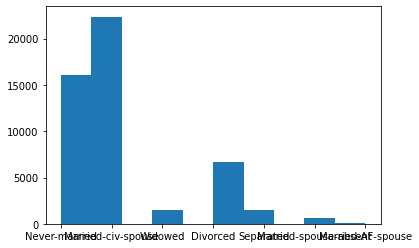

In [29]:
plt.hist(df['marital-status'])

(array([ 4502.,   982.,  8970., 11021.,  5606.,  6082.,  6946.,   240.,
         2355.,  2086.]),
 array([ 0. ,  1.3,  2.6,  3.9,  5.2,  6.5,  7.8,  9.1, 10.4, 11.7, 13. ]),
 <a list of 10 Patch objects>)

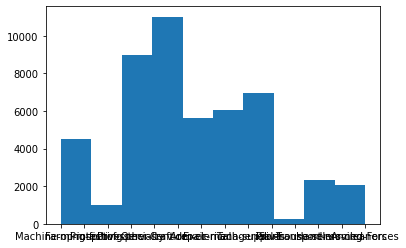

In [30]:
plt.hist(df['occupation'])

(array([ 7569.,     0., 19703.,     0., 12557.,     0.,  5124.,     0.,
         2331.,  1506.]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 <a list of 10 Patch objects>)

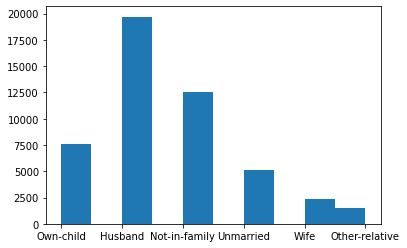

In [31]:
plt.hist(df['relationship'])

(array([ 4683.,     0., 41714.,     0.,     0.,  1517.,     0.,   406.,
            0.,   470.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <a list of 10 Patch objects>)

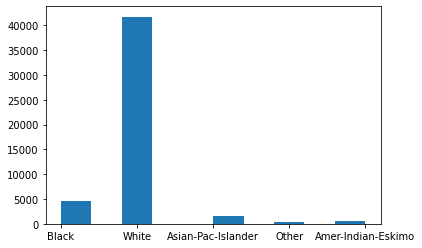

In [32]:
plt.hist(df['race'])

(array([32614.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0., 16176.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

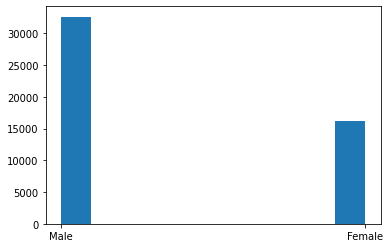

In [33]:
plt.hist(df['gender'])

(array([45723.,   640.,   444.,   378.,   289.,   435.,   420.,   206.,
          117.,   138.]),
 array([ 0.,  4.,  8., 12., 16., 20., 24., 28., 32., 36., 40.]),
 <a list of 10 Patch objects>)

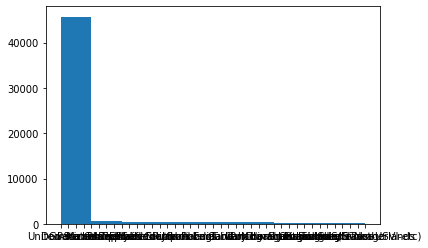

In [34]:
plt.hist(df['native-country'])

#Pair Plot


<Figure size 432x288 with 0 Axes>

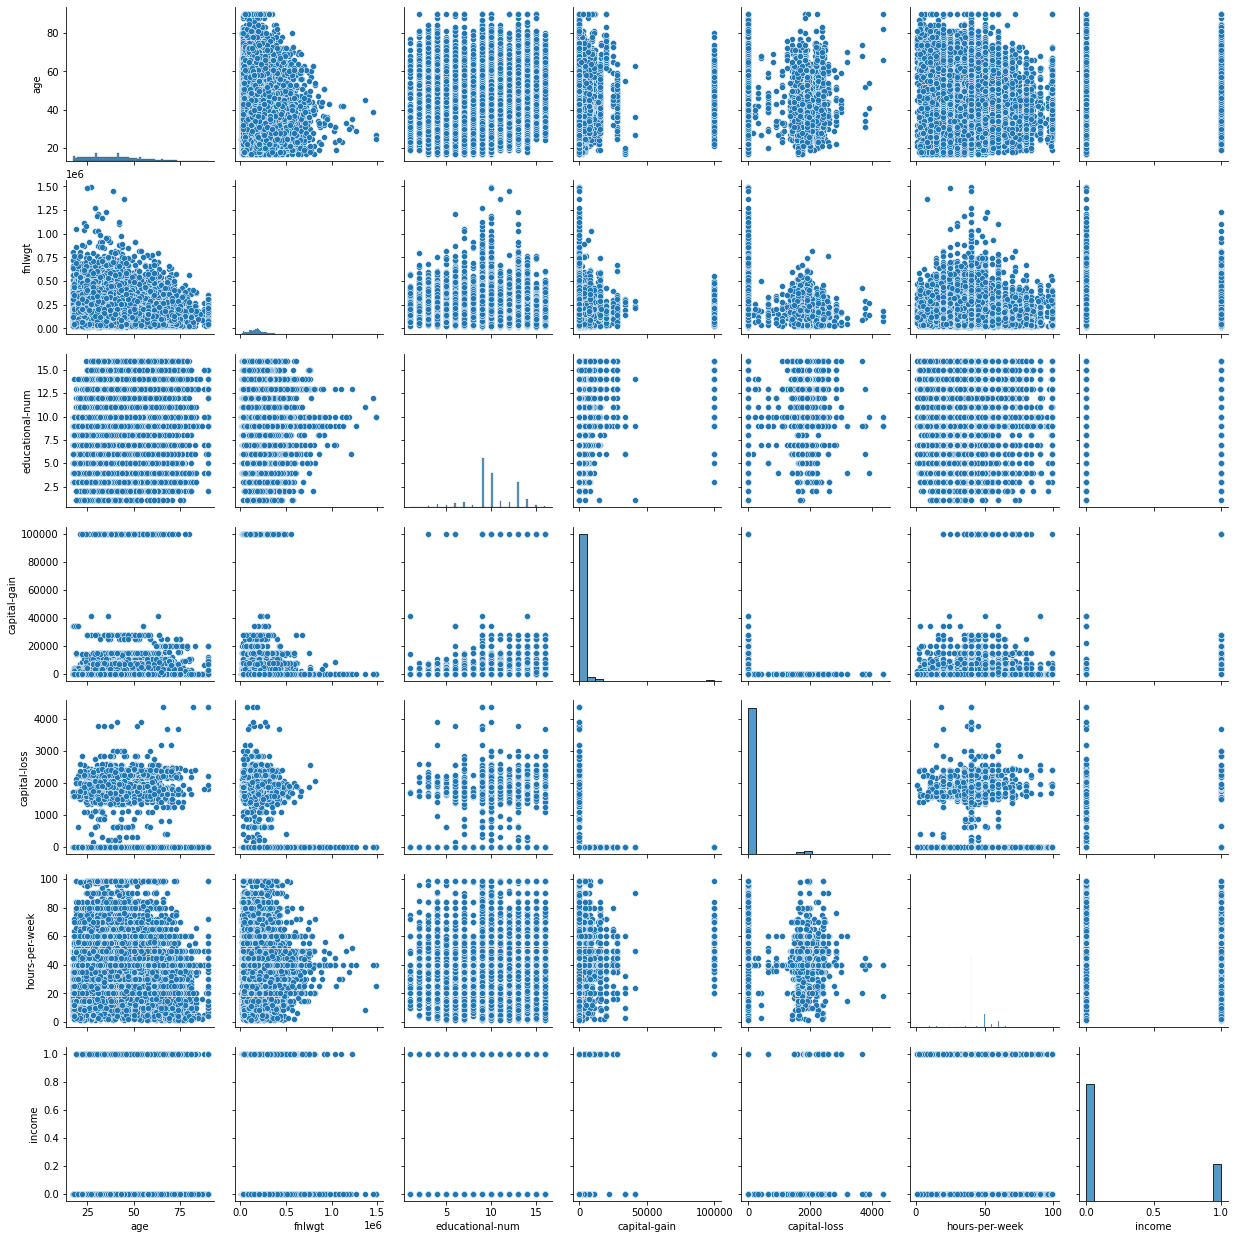

In [35]:
plt.figure()
sns.pairplot(num_data)
plt.show()

#Hexplot for numerical data

<Figure size 432x288 with 0 Axes>

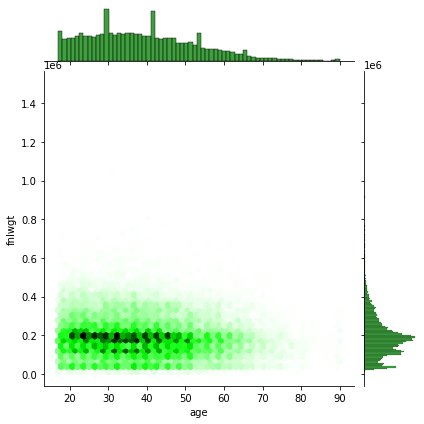

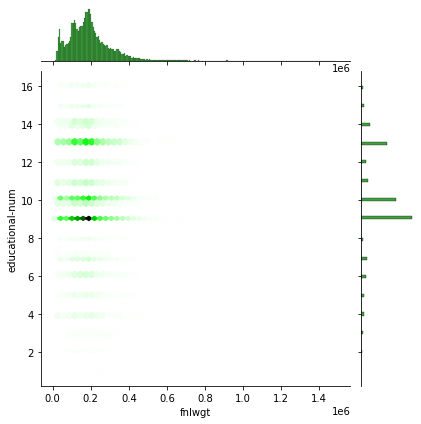

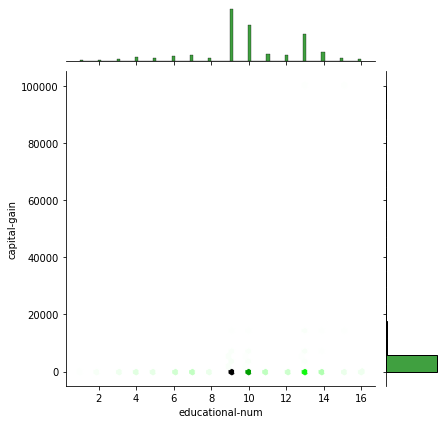

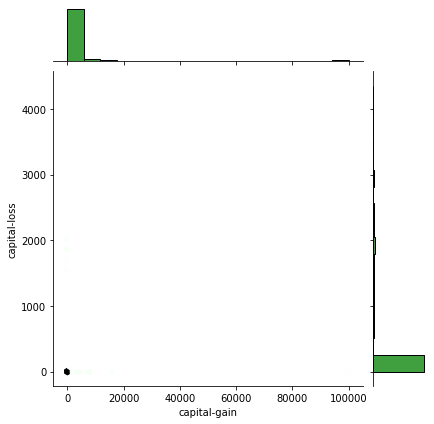

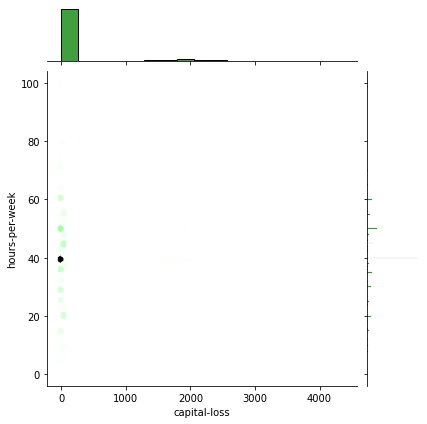

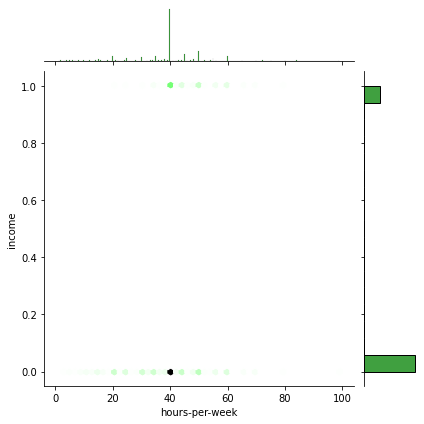

In [36]:
plt.figure()
for i in range(len(num_data.columns)-1):
    sns.jointplot(x = num_data.columns[i], y = num_data.columns[i+1], data=num_data, kind='hex', color='green')
    plt.show()

#Scatter Plot for numerical data


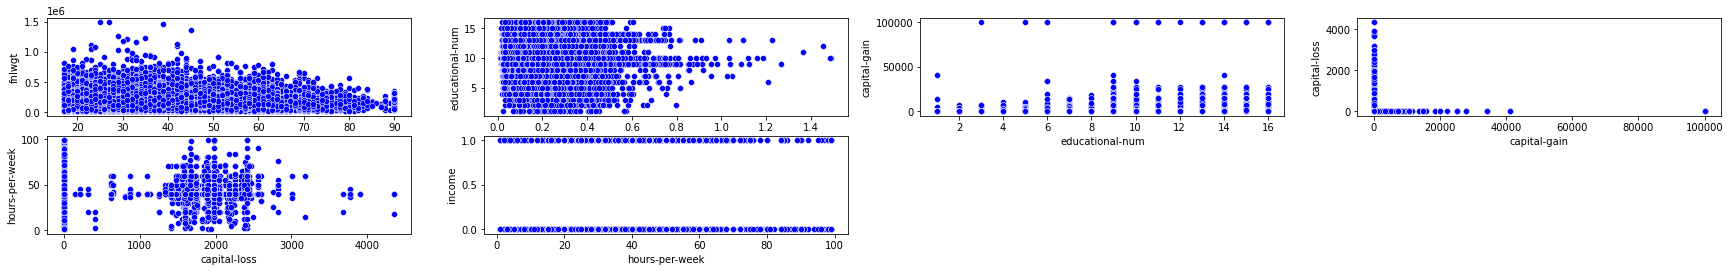

In [37]:
plt.subplots(figsize=(30, 30))
count = 1
for i in range(len(num_data.columns)-1):
    plt.subplot(14, 4, count)
    sns.scatterplot(x=num_data.columns[i], y=num_data.columns[i+1],
                        data=num_data, color='blue')
    count += 1
plt.show()

#Correlation Plot

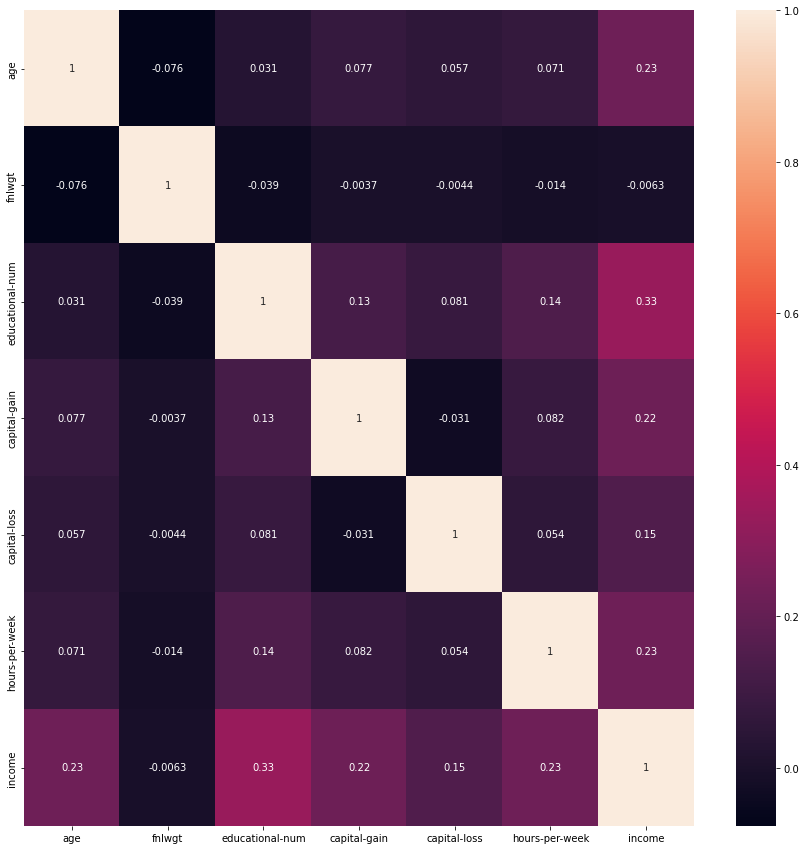

In [38]:
plt.figure(figsize=(15,15))
sns.heatmap(num_data.corr(),annot=True)

#CountPlot

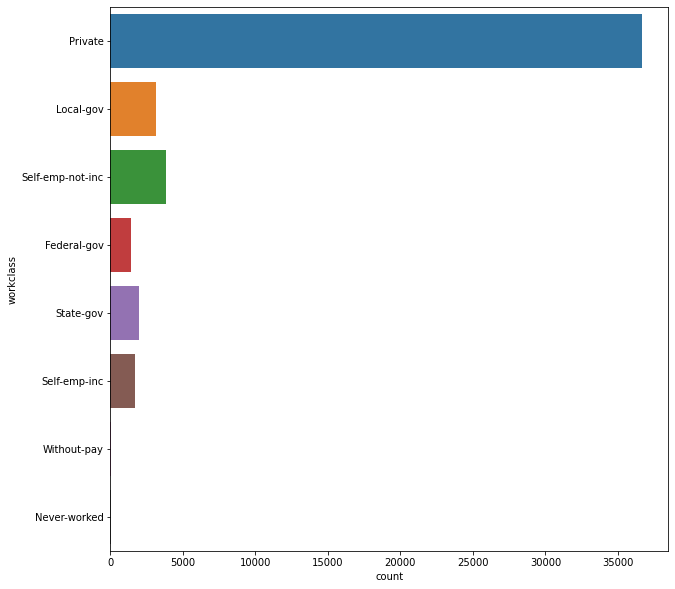

In [39]:
plt.figure(figsize=(10,10))
sns.countplot(y=cat_data['workclass'])

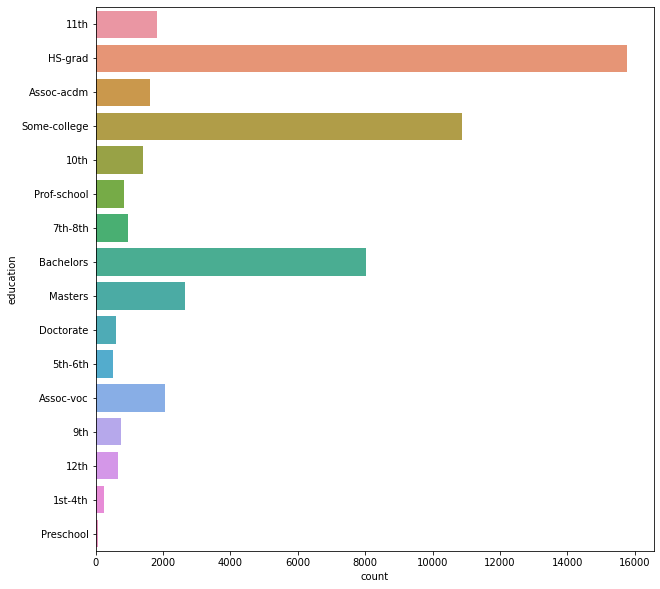

In [40]:
plt.figure(figsize=(10,10))
sns.countplot(y=cat_data['education'])

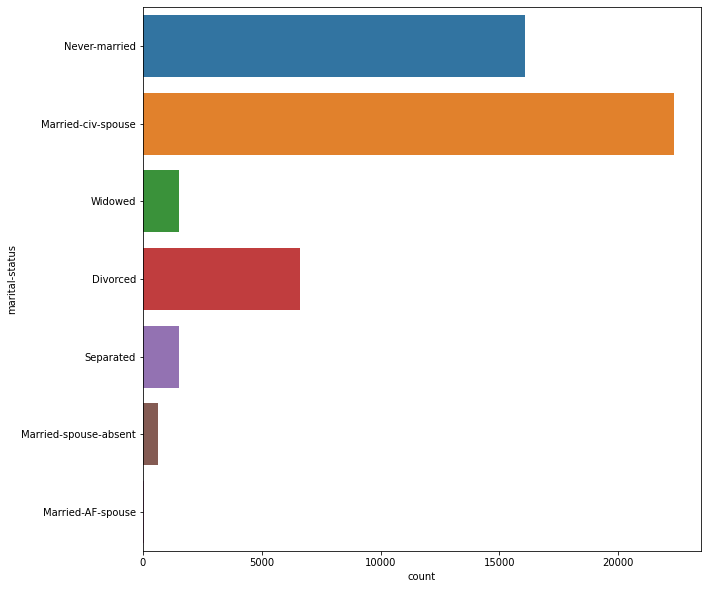

In [41]:
plt.figure(figsize=(10,10))
sns.countplot(y=cat_data['marital-status'])

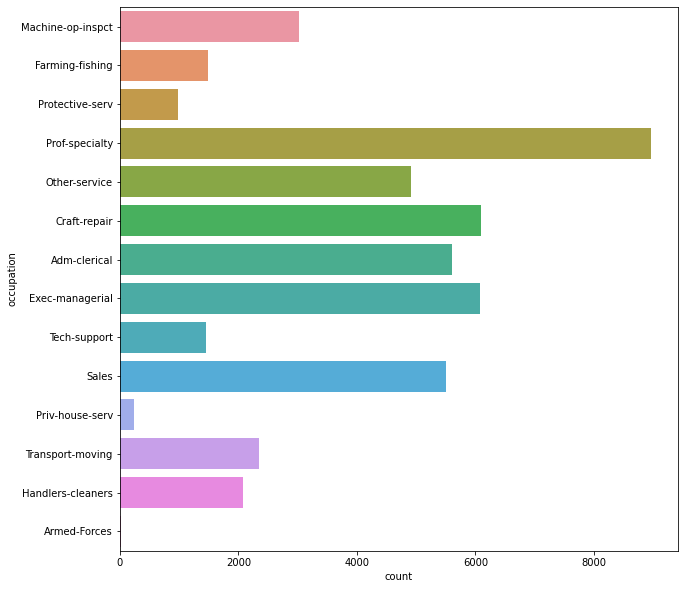

In [42]:
plt.figure(figsize=(10,10))
sns.countplot(y=cat_data['occupation'])

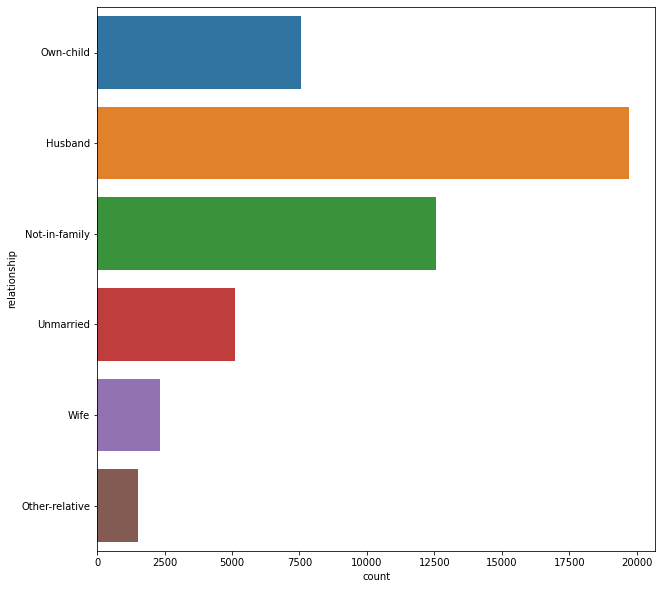

In [43]:
plt.figure(figsize=(10,10))
sns.countplot(y=cat_data['relationship'])

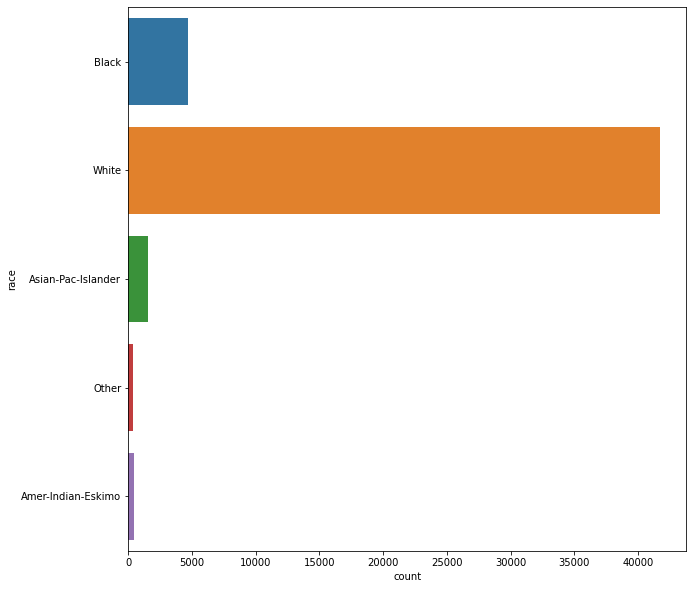

In [44]:
plt.figure(figsize=(10,10))
sns.countplot(y=cat_data['race'])

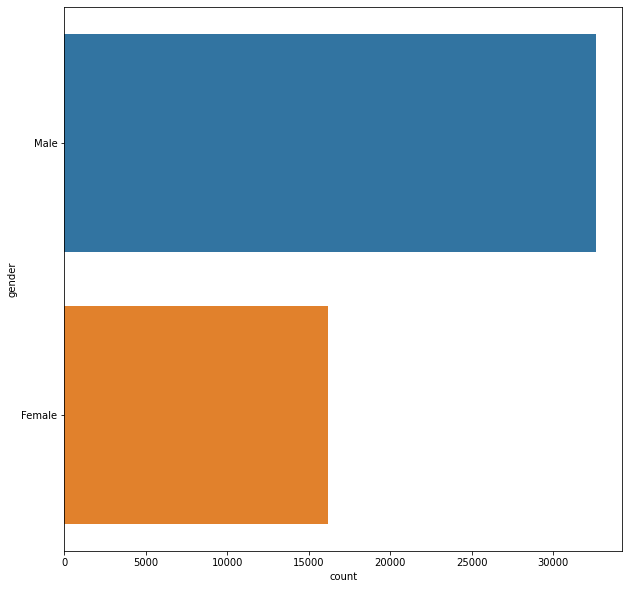

In [45]:
plt.figure(figsize=(10,10))
sns.countplot(y=cat_data['gender'])

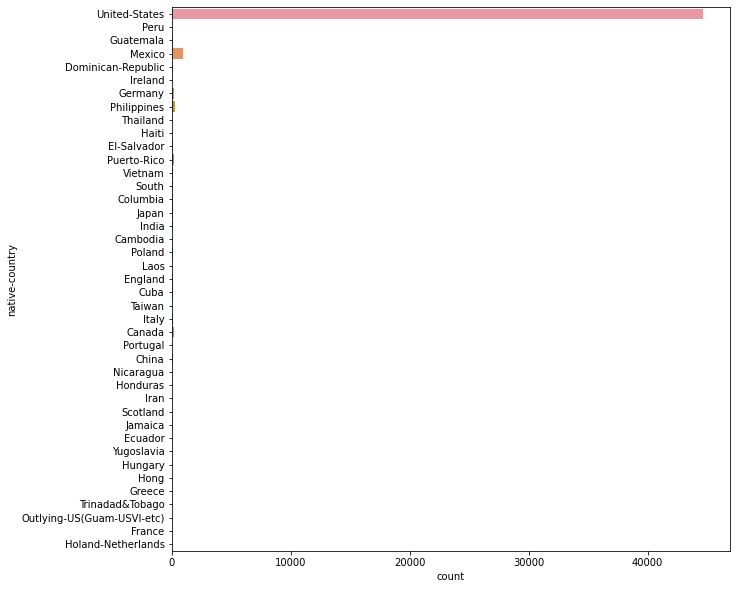

In [46]:
plt.figure(figsize=(10,10))
sns.countplot(y=cat_data['native-country'])

#Relational Box plot 

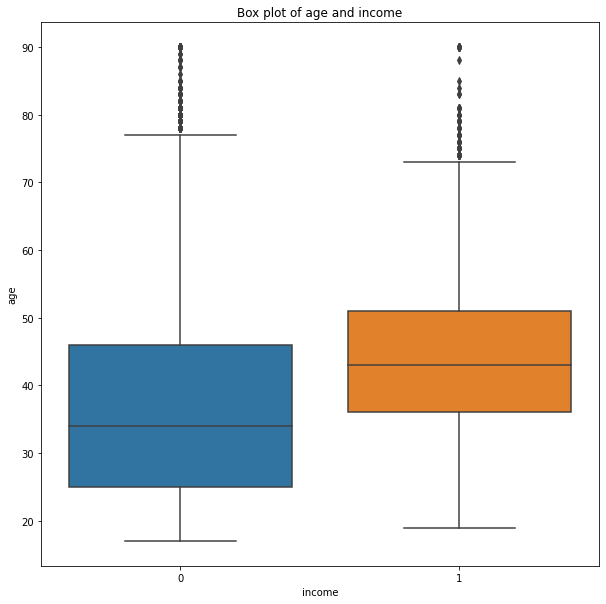

In [47]:
fig = plt.figure(figsize=(10,10))
sns.boxplot(x='income',y='age',data=df).set_title('Box plot of age and income')
plt.show()

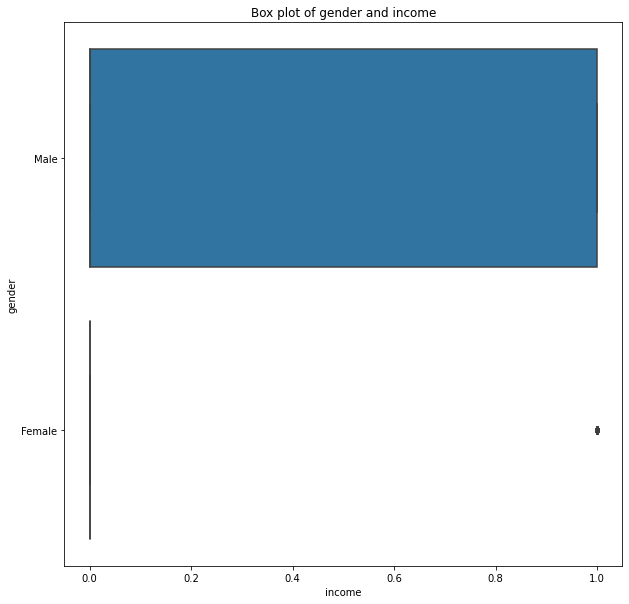

In [48]:
fig = plt.figure(figsize=(10,10))
sns.boxplot(x='income',y='gender',data=df).set_title('Box plot of gender and income')
plt.show()

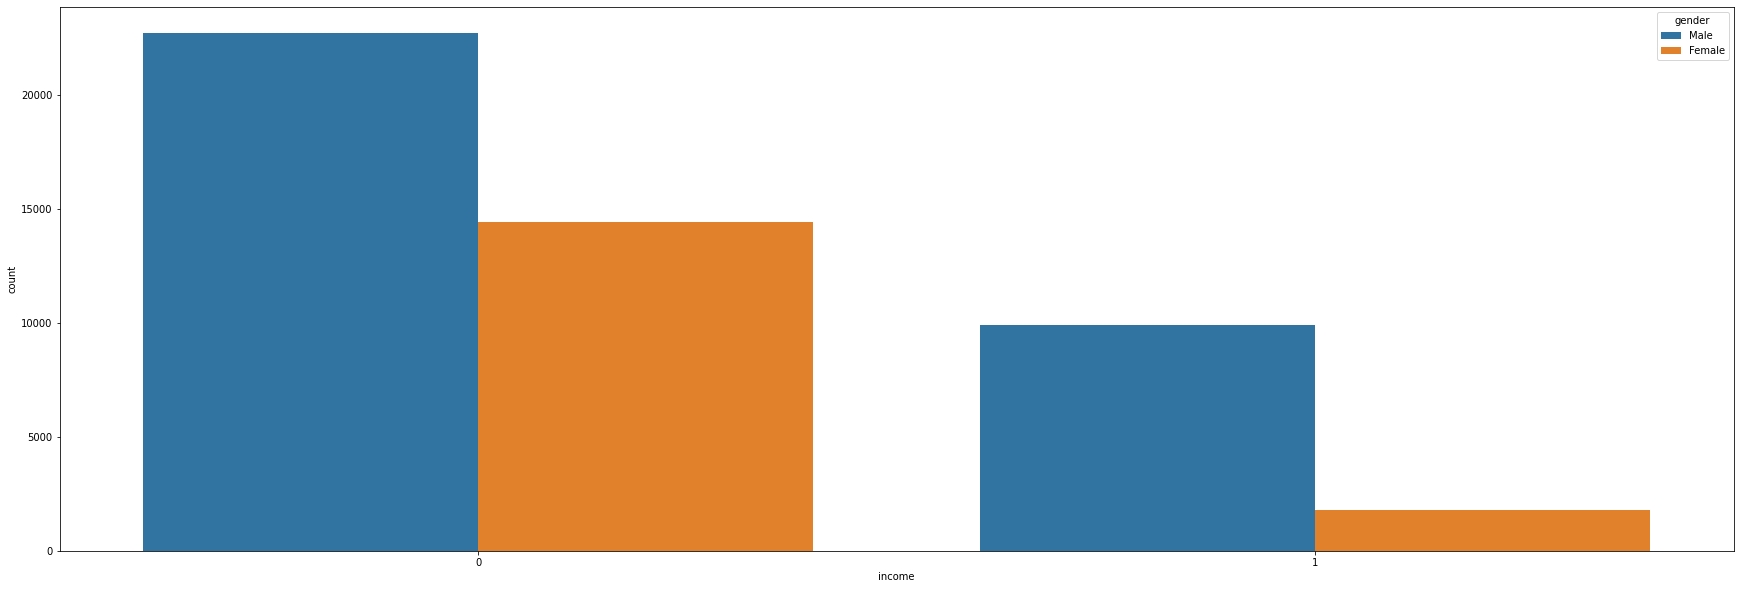

In [49]:
#relationship of gender and income
plt.figure(figsize=(30,10))
sns.countplot(x="income", hue="gender",data=df)
plt.show()

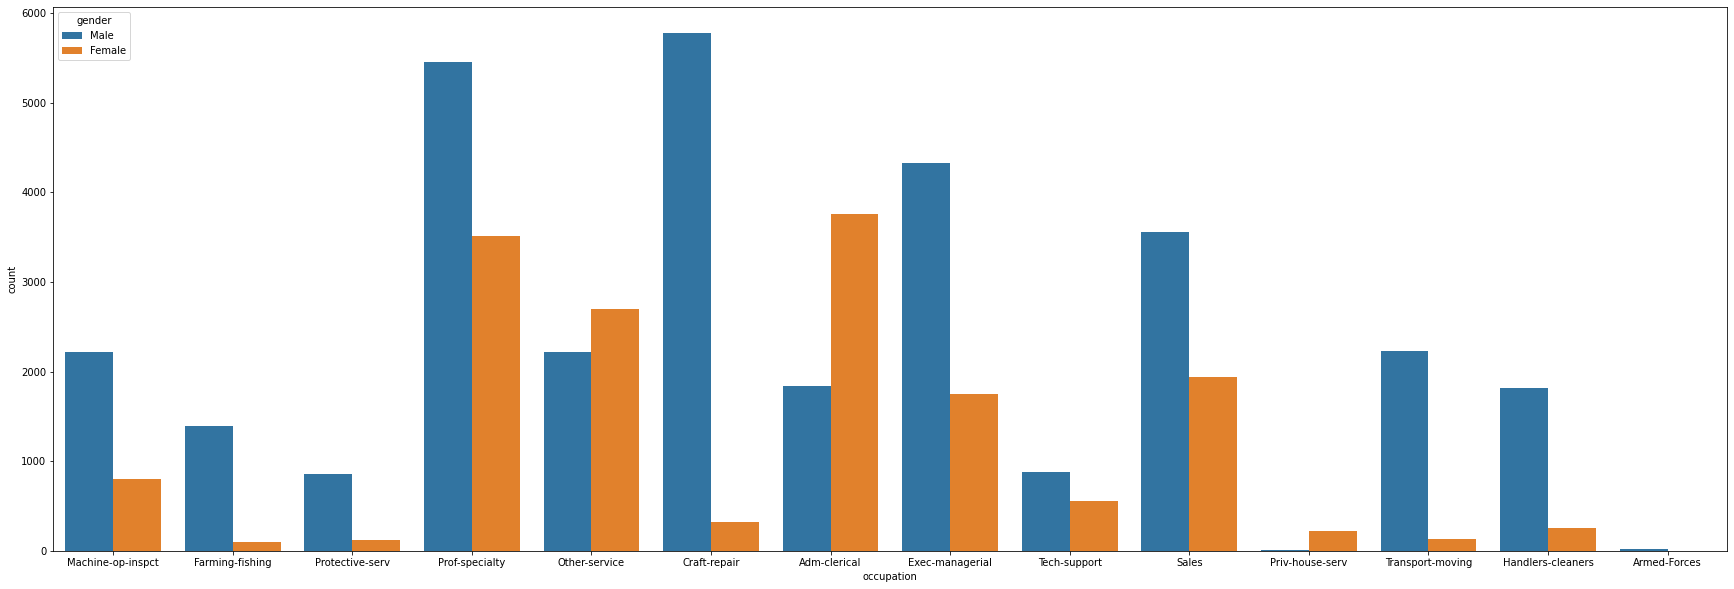

In [50]:
#relationship of occupation with gender
plt.figure(figsize=(30,10))
sns.countplot(x="occupation", hue="gender",data=df)
plt.show()

#Z-SCORE METHOD
Using Z score method,we can find out how many standard deviations value away from the mean.

In [51]:
output=[]
def Z_Score_Outlier(df):
    meann = np.mean(df)
    std_dev = np.std(df)
    for i in df: 
        z = (i-meann)/std_dev
        if np.abs(z) > 3: 
            output.append(i)
    print("Outliers:",output)
Z_Score_Outlier(df['age'])

Outliers: [80, 90, 80, 81, 82, 83, 81, 85, 80, 90, 81, 84, 81, 89, 81, 83, 81, 82, 80, 90, 81, 83, 80, 90, 90, 84, 80, 80, 80, 81, 90, 85, 90, 81, 81, 80, 80, 81, 80, 88, 87, 90, 83, 80, 90, 81, 81, 90, 82, 90, 87, 81, 88, 80, 81, 80, 81, 90, 88, 89, 84, 80, 80, 83, 81, 90, 80, 81, 90, 88, 90, 90, 80, 90, 81, 82, 81, 80, 83, 90, 90, 81, 90, 80, 90, 90, 84, 90, 80, 90, 81, 83, 84, 81, 85, 82, 80, 90, 90, 90, 84, 80, 90, 90, 84, 90, 90, 90, 90, 82, 81, 90, 84, 81, 82, 81, 80, 90, 80, 84, 82, 90, 84, 90, 83, 81, 80, 80, 80, 90, 90, 80, 90, 90, 81, 83, 82, 90, 90, 81, 80, 80, 90, 80, 82, 85, 80, 90, 81, 80, 81, 82, 88, 90, 82, 88, 84, 83, 86, 90, 90, 82, 83, 81, 90, 80, 81, 84, 84, 90, 80, 81, 81, 81, 90, 87, 90, 80, 80, 82, 90, 90, 85, 82, 81]


In [52]:
output=[]
def Z_Score_Outlier(df):
    meann = np.mean(df)
    std_dev = np.std(df)
    for i in df: 
        z = (i-meann)/std_dev
        if np.abs(z) > 3: 
            output.append(i)
    print("Outliers:",output)
Z_Score_Outlier(df['fnlwgt'])

Outliers: [537222, 513100, 512864, 599057, 542610, 652784, 573446, 662460, 629900, 509364, 632733, 560313, 651702, 644278, 535852, 522241, 581128, 608881, 914061, 624006, 510072, 593246, 714597, 816750, 552529, 575172, 622192, 566066, 614113, 548568, 565769, 789600, 864960, 723746, 692831, 535869, 638116, 698039, 677398, 547931, 666014, 765214, 761800, 1047822, 544319, 617917, 522881, 750972, 520231, 589155, 538193, 588739, 588484, 528618, 806552, 858091, 663291, 581025, 656488, 557349, 655066, 737315, 541755, 594521, 589838, 605504, 558752, 772919, 884434, 604045, 697806, 632271, 587310, 538243, 1490400, 768659, 764638, 517995, 718736, 547108, 882849, 746660, 786418, 565313, 653215, 576645, 510643, 538099, 539019, 531055, 594187, 685955, 548361, 606111, 592029, 513977, 647591, 566066, 553588, 624572, 535740, 607118, 580591, 557853, 635913, 557805, 626493, 914061, 557349, 953588, 558344, 590204, 679853, 516701, 535762, 814850, 874728, 506830, 594194, 538583, 602513, 589809, 507492, 546

In [53]:
output=[]
def Z_Score_Outlier(df):
    meann = np.mean(df)
    std_dev = np.std(df)
    for i in df: 
        z = (i-meann)/std_dev
        if np.abs(z) > 3: 
            output.append(i)
    print("Outliers:",output)
Z_Score_Outlier(df['educational-num'])

Outliers: [2, 2, 2, 1, 1, 2, 2, 1, 1, 2, 2, 2, 1, 1, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 1, 1, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 1, 2, 1, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 1, 2, 2, 2, 2, 1, 1, 2, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 1, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2, 2, 1, 1, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 1, 2, 2, 1, 1, 2, 2, 1, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 1, 1, 2, 1, 1, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1]


In [54]:
output=[]
def Z_Score_Outlier(df):
    meann = np.mean(df)
    std_dev = np.std(df)
    for i in df: 
        z = (i-meann)/std_dev
        if np.abs(z) > 3: 
            output.append(i)
    print("Outliers:",output)
Z_Score_Outlier(df['capital-gain'])

Outliers: [99999, 27828, 99999, 99999, 99999, 27828, 99999, 99999, 99999, 27828, 25236, 99999, 99999, 99999, 99999, 99999, 27828, 99999, 99999, 99999, 99999, 99999, 99999, 99999, 99999, 99999, 99999, 27828, 41310, 99999, 99999, 34095, 99999, 99999, 99999, 99999, 99999, 27828, 99999, 99999, 99999, 99999, 99999, 27828, 27828, 27828, 99999, 99999, 99999, 99999, 99999, 99999, 27828, 99999, 99999, 99999, 27828, 99999, 99999, 99999, 99999, 99999, 99999, 99999, 27828, 99999, 27828, 25124, 99999, 99999, 99999, 99999, 99999, 99999, 99999, 99999, 99999, 99999, 99999, 99999, 99999, 99999, 27828, 25236, 99999, 27828, 99999, 27828, 99999, 99999, 99999, 99999, 99999, 99999, 99999, 99999, 25236, 27828, 27828, 27828, 27828, 99999, 27828, 99999, 99999, 99999, 99999, 27828, 99999, 27828, 25124, 99999, 99999, 99999, 99999, 27828, 34095, 25236, 99999, 99999, 99999, 99999, 25124, 99999, 99999, 27828, 99999, 99999, 99999, 99999, 99999, 99999, 99999, 99999, 99999, 99999, 99999, 27828, 99999, 99999, 34095, 99

In [55]:
output=[]
def Z_Score_Outlier(df):
    meann = np.mean(df)
    std_dev = np.std(df)
    for i in df: 
        z = (i-meann)/std_dev
        if np.abs(z) > 3: 
            output.append(i)
    print("Outliers:",output)
Z_Score_Outlier(df['capital-loss'])

Outliers: [1721, 1876, 2415, 1887, 1887, 1887, 1887, 1977, 2057, 1429, 1590, 2057, 1721, 1887, 1485, 1485, 1977, 1887, 1721, 1887, 2051, 2377, 1672, 1628, 1902, 1672, 1602, 1902, 1590, 1977, 1741, 1887, 2444, 1876, 1902, 1408, 1902, 2001, 2001, 2415, 2042, 1740, 1876, 1825, 1902, 1887, 1977, 1887, 1902, 1887, 1902, 2415, 1848, 1719, 3004, 1590, 1977, 1887, 1977, 2001, 1902, 1977, 2179, 1902, 1573, 1429, 2205, 1977, 2339, 1887, 2339, 1726, 2258, 1672, 1590, 1887, 1340, 2415, 1602, 1504, 1887, 2415, 2559, 1977, 1848, 2258, 1902, 1887, 1668, 1974, 1977, 1741, 2205, 1980, 2051, 2377, 1902, 2444, 1564, 1408, 1902, 1977, 2547, 1902, 2002, 2057, 2001, 1977, 1977, 1628, 1902, 1876, 1848, 1719, 1669, 1902, 1902, 2339, 1902, 2339, 1902, 1887, 1902, 1887, 1719, 1429, 2001, 1485, 1902, 1980, 1504, 1887, 1902, 1977, 1617, 1741, 2051, 2205, 1980, 1902, 1887, 2205, 1721, 1602, 1573, 1977, 2415, 3175, 1668, 2472, 1669, 1602, 2057, 1504, 2174, 1902, 1902, 1579, 1902, 1741, 1902, 1902, 1579, 1590, 1977,

In [56]:
output=[]
def Z_Score_Outlier(df):
    meann = np.mean(df)
    std_dev = np.std(df)
    for i in df: 
        z = (i-meann)/std_dev
        if np.abs(z) > 3: 
            output.append(i)
    print("Outliers:",output)
Z_Score_Outlier(df['hours-per-week'])

Outliers: [90, 84, 80, 84, 80, 99, 80, 80, 96, 90, 3, 1, 99, 80, 80, 84, 99, 99, 2, 2, 78, 80, 99, 84, 80, 3, 80, 80, 80, 99, 92, 3, 80, 84, 99, 80, 84, 85, 1, 99, 2, 84, 80, 99, 98, 80, 84, 96, 99, 80, 90, 78, 84, 80, 90, 80, 86, 80, 84, 80, 99, 80, 85, 80, 80, 80, 80, 3, 2, 80, 84, 99, 80, 84, 2, 99, 99, 99, 99, 90, 80, 80, 96, 2, 84, 99, 99, 90, 99, 80, 88, 2, 80, 80, 90, 79, 78, 84, 2, 80, 80, 84, 3, 1, 84, 99, 89, 98, 80, 80, 90, 3, 80, 99, 80, 78, 2, 99, 99, 80, 80, 2, 80, 80, 99, 80, 99, 99, 80, 80, 90, 80, 78, 84, 3, 80, 80, 1, 80, 99, 99, 99, 80, 99, 80, 88, 3, 90, 3, 80, 85, 84, 3, 98, 80, 99, 84, 2, 80, 99, 99, 1, 2, 99, 96, 84, 99, 80, 1, 99, 99, 2, 99, 1, 84, 80, 90, 3, 2, 99, 99, 3, 85, 99, 3, 3, 99, 3, 80, 80, 99, 2, 99, 99, 80, 80, 99, 99, 2, 80, 2, 80, 86, 80, 3, 80, 2, 84, 3, 80, 80, 3, 84, 99, 80, 99, 80, 84, 99, 2, 80, 3, 80, 2, 80, 99, 2, 80, 90, 84, 92, 80, 80, 99, 80, 3, 84, 84, 80, 90, 80, 80, 80, 2, 2, 1, 98, 80, 80, 80, 99, 2, 1, 80, 80, 99, 80, 1, 80, 78, 90,

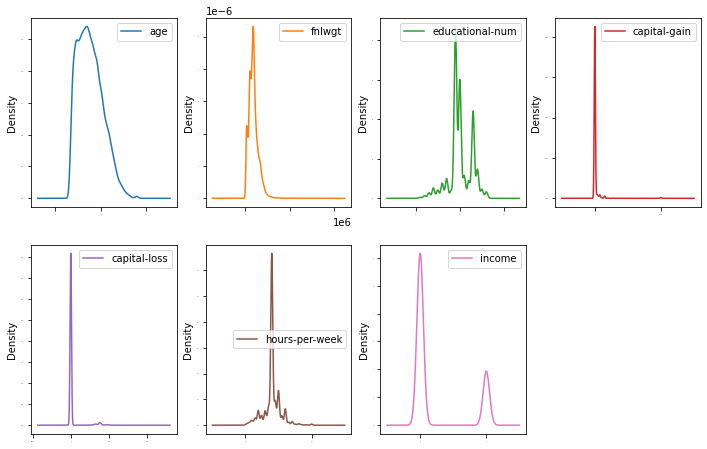

In [57]:
#Density plots
df.plot(kind='density', subplots=True, layout=(4,4), sharex=False, legend=True, fontsize=1, figsize=(12,16))
plt.show()